# lecture 15 - Scikit-learn 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('./datasets_files/smsspamcollection.tsv',sep='\t')

In [6]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [8]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [9]:
len(df)

5572

In [11]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [12]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

## data visualization

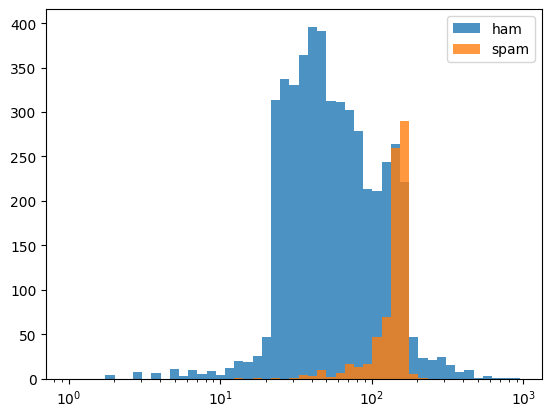

In [15]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

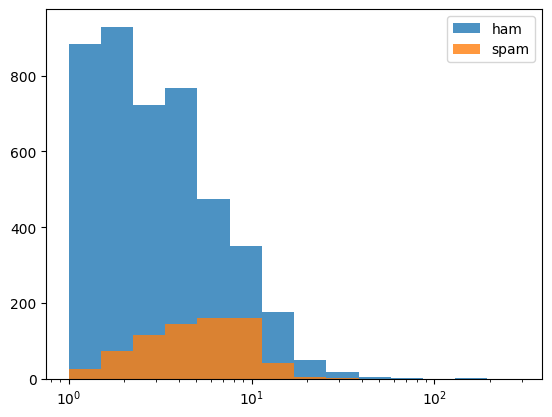

In [16]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

there seem to be no values where one would pick spam over ham. We'll still try to build a machine learning classification model, but we should expect poor results

## data splitting

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X = df[['length','punct']]

In [22]:
y = df['label']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
X_train.shape

(3900, 2)

In [26]:
X_test.shape

(1672, 2)

In [28]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

## train the model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr_model = LogisticRegression(solver='lbfgs')

In [31]:
lr_model.fit(X_train,y_train)

LogisticRegression()